In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("./train.csv")
test_data = pd. read_csv("./test.csv")

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
def group_passengers():
    group = []

    for x in train_data["PassengerId"]:
        g = str(x).split("_")[0]
        group.append(g)
    return group

group = group_passengers()

train_data["Group"] = group

In [39]:
train_data.query("Name.isnull()")

train_data["Family"].isna = train_data.groupby("Group")["Family"].agg(lambda x: x.value_counts().index[0])

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,Family,Deck,Num,shipSide,NumBin,totalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,Ofracculy,B,0.0,P,"(-1.894, 189.4]",0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,Vines,F,0.0,S,"(-1.894, 189.4]",736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,Susent,A,0.0,S,"(-1.894, 189.4]",10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,Susent,A,0.0,S,"(-1.894, 189.4]",5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,Santantines,F,1.0,S,"(-1.894, 189.4]",1091.0


In [6]:
train_data["Family"] = [str(x).split()[-1] for x in train_data["Name"].to_list()]

In [7]:
# Impute family from groups

In [8]:
def split_cabin_info(cabin: str):
    if pd.isna(cabin):
        return np.nan, np.nan, np.nan

    x = cabin.split("/")

    return x[0], int(x[1]), x[2]

In [9]:
deck = []
num = []
shipSide = []

for x in train_data["Cabin"]:
    d, n, s = split_cabin_info(x)
    deck.append(d)
    num.append(n)
    shipSide.append(s)

In [11]:
train_data["Deck"], train_data["Num"], train_data["shipSide"] = deck, num, shipSide

In [12]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Family,Deck,Num,shipSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,Ofracculy,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,Vines,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,Susent,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,Susent,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,Santantines,F,1.0,S


array([<AxesSubplot:title={'center':'Transported'}, xlabel='shipSide,Deck'>],
      dtype=object)

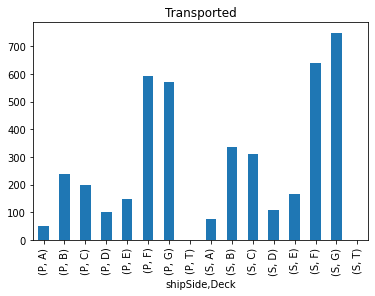

In [13]:
train_data.groupby(["shipSide","Deck",])["Transported"].sum("Transported").plot(subplots=True, kind="bar")

<AxesSubplot:xlabel='NumBin'>

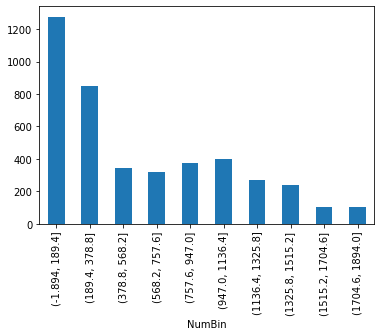

In [14]:
train_data["NumBin"] = pd.cut(train_data["Num"], bins=10)

train_data.groupby(["NumBin"])["Transported"].sum("Transported").plot(kind="bar")

<AxesSubplot:>

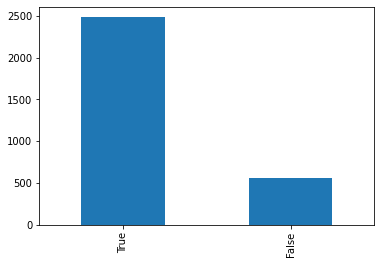

In [15]:
train_data.query("CryoSleep == True")["Transported"].value_counts().plot(kind="bar")

In [16]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Family,Deck,Num,shipSide,NumBin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,Ofracculy,B,0.0,P,"(-1.894, 189.4]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,Vines,F,0.0,S,"(-1.894, 189.4]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,Susent,A,0.0,S,"(-1.894, 189.4]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,Susent,A,0.0,S,"(-1.894, 189.4]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,Santantines,F,1.0,S,"(-1.894, 189.4]"


In [17]:
#AgeGroup

def return_age_group():
    pass

In [ ]:
#Impute missing spending via Cryosleep
#Impute VIP status via spending and family
#HomePlanet and Destination via family and group

In [ ]:
#totalSpend via summing all spending

In [18]:
train_data.loc[train_data["CryoSleep"] == True ,["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0.0

In [19]:
train_data["totalSpent"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

In [21]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
Group             0
Family            0
Deck            199
Num             199
shipSide        199
NumBin          199
totalSpent        0
dtype: int64